In [7]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/he-chang/data5100project/main/university_data_instructors.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 118 entries, institute_id to e_nonresAlien_m
dtypes: float64(87), int64(31)
memory usage: 169.8 KB


### TODO - Cleanup NaN

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 171
Columns: 118 entries, institute_id to e_nonresAlien_m
dtypes: float64(87), int64(31)
memory usage: 154.3 KB


## Calculate Percentages and difference between total graduation rate and BiPOC graduation rate

In [13]:
# Function to calculate the percentages
def calcPercentage(overall_total, group_total):
  if overall_total == 0:
    return 0
  else:
    return group_total / overall_total

In [14]:
def getCohortGroupTotal(group_name):
  new_group_name = group_name
  return new_group_name.replace("gr", "co")

In [15]:
cohort_groups = ['co_AmerInd_AlaskNtv', 'co_AmerInd_AlaskNtv', 'co_AmerInd_AlaskNtv', 'co_Asian', 'co_AfrAmer', 'co_Hispanic', 'co_Hi_PacIsland', 'co_White', 'co_2orMore', 'co_unknown', 'co_nonresAlien']

for group in cohort_groups:
  new_column_name = group + "_pct"
  df[new_column_name] = df.apply(lambda x: calcPercentage(x['co_total'], x[group]), axis = 1)

cohort_m_groups = ['co_AmerInd_AlaskNtv_m', 'co_Asian_m', 'co_AfrAmer_m', 'co_Hispanic_m', 'co_Hi_PacIsland_m', 'co_White_m', 'co_2orMore_m', 'co_unknown_m']

for group in cohort_m_groups:
  new_column_name = group + "_pct"
  df[new_column_name] = df.apply(lambda x: calcPercentage(x['co_total_m'], x[group]), axis = 1)

cohort_w_groups = ['co_AmerInd_AlaskNtv_w', 'co_Asian_w', 'co_AfrAmer_w', 'co_Hispanic_w', 'co_Hi_PacIsland_w', 'co_White_w', 'co_2orMore_w', 'co_unknown_w']

for group in cohort_w_groups:
  new_column_name = group + "_pct"
  df[new_column_name] = df.apply(lambda x: calcPercentage(x['co_total_w'], x[group]), axis = 1)

df.head()

,institute_id,year,gr_total,gr_total_m,gr_total_w,gr_AmerInd_AlaskNtv,gr_AmerInd_AlaskNtv_m,gr_AmerInd_AlaskNtv_w,gr_Asian,gr_Asian_m,...,co_2orMore_m_pct,co_unknown_m_pct,co_AmerInd_AlaskNtv_w_pct,co_Asian_w_pct,co_AfrAmer_w_pct,co_Hispanic_w_pct,co_Hi_PacIsland_w_pct,co_White_w_pct,co_2orMore_w_pct,co_unknown_w_pct
0,234827,2013,759.0,349.0,410.0,6.0,4.0,2.0,28.0,17.0,...,0.056738,0.028369,0.007752,0.024548,0.014212,0.090439,0.001292,0.789406,0.051680,0.018088
1,234827,2014,829.0,358.0,471.0,1.0,1.0,0.0,23.0,11.0,...,0.056505,0.021025,0.005057,0.021492,0.010114,0.091024,0.003793,0.787611,0.048040,0.026549
2,234827,2015,851.0,396.0,455.0,3.0,2.0,1.0,9.0,3.0,...,0.069343,0.037713,0.003641,0.021845,0.024272,0.075243,0.000000,0.737864,0.080097,0.038835
3,234827,2016,876.0,398.0,478.0,4.0,2.0,2.0,17.0,12.0,...,0.068758,0.056695,0.004819,0.016867,0.019277,0.125301,0.006024,0.701205,0.061446,0.055422
4,234827,2017,701.0,299.0,402.0,2.0,0.0,2.0,16.0,9.0,...,0.080189,0.069182,0.004144,0.023481,0.022099,0.113260,0.001381,0.704420,0.064917,0.058011


In [16]:
grad_groups = ['gr_total', 'gr_AmerInd_AlaskNtv', 'gr_Asian', 'gr_AfrAmer', 'gr_Hispanic', 'gr_Hi_PacIsland', 'gr_White', 'gr_2orMore', 'gr_unknown', 'gr_nonresAlien']

for group in grad_groups:
  new_column_name = group + "_pct"
  total_group = getCohortGroupTotal(group)
  df[new_column_name] = df.apply(lambda x: calcPercentage(x[total_group], x[group]), axis = 1)

cohort_m_groups = ['gr_total_m', 'gr_AmerInd_AlaskNtv_m', 'gr_Asian_m', 'gr_AfrAmer_m', 'gr_Hispanic_m', 'gr_Hi_PacIsland_m', 'gr_White_m', 'gr_2orMore_m', 'gr_unknown_m']

for group in cohort_m_groups:
  new_column_name = group + "_pct"
  total_group = getCohortGroupTotal(group)
  df[new_column_name] = df.apply(lambda x: calcPercentage(x[total_group], x[group]), axis = 1)

cohort_w_groups = ['gr_total_w', 'gr_AmerInd_AlaskNtv_w', 'gr_Asian_w', 'gr_AfrAmer_w', 'gr_Hispanic_w', 'gr_Hi_PacIsland_w', 'gr_White_w', 'gr_2orMore_w', 'gr_unknown_w']

for group in cohort_w_groups:
  new_column_name = group + "_pct"
  total_group = getCohortGroupTotal(group)
  df[new_column_name] = df.apply(lambda x: calcPercentage(x[total_group], x[group]), axis = 1)

df.head()

,institute_id,year,gr_total,gr_total_m,gr_total_w,gr_AmerInd_AlaskNtv,gr_AmerInd_AlaskNtv_m,gr_AmerInd_AlaskNtv_w,gr_Asian,gr_Asian_m,...,gr_unknown_m_pct,gr_total_w_pct,gr_AmerInd_AlaskNtv_w_pct,gr_Asian_w_pct,gr_AfrAmer_w_pct,gr_Hispanic_w_pct,gr_Hi_PacIsland_w_pct,gr_White_w_pct,gr_2orMore_w_pct,gr_unknown_w_pct
0,234827,2013,759.0,349.0,410.0,6.0,4.0,2.0,28.0,17.0,...,0.500000,0.529716,0.333333,0.578947,0.363636,0.457143,1.000000,0.548282,0.450000,0.500000
1,234827,2014,829.0,358.0,471.0,1.0,1.0,0.0,23.0,11.0,...,0.500000,0.595449,0.000000,0.705882,0.625000,0.597222,0.333333,0.598716,0.500000,0.666667
2,234827,2015,851.0,396.0,455.0,3.0,2.0,1.0,9.0,3.0,...,0.451613,0.552184,0.333333,0.333333,0.450000,0.629032,0.000000,0.557566,0.469697,0.593750
3,234827,2016,876.0,398.0,478.0,4.0,2.0,2.0,17.0,12.0,...,0.382979,0.575904,0.500000,0.357143,0.375000,0.596154,0.600000,0.587629,0.549020,0.565217
4,234827,2017,701.0,299.0,402.0,2.0,0.0,2.0,16.0,9.0,...,0.454545,0.555249,0.666667,0.411765,0.250000,0.560976,0.000000,0.576471,0.489362,0.523810


In [19]:
# Staff BiPOC percentage = all non-white race and ethnicities staff counts added together / total staff

df['hr_BiPOC_pct'] = ((df['hr_AmerInd_AlaskNtv'] + df['hr_Asian'] + df['hr_AfrAmer'] + df['hr_Hispanic'] + df['hr_Hi_PacIsland'] + df['hr_2orMore'])/df['hr_total'])

In [20]:
# Cohort BiPOC Percentage = all non-white race and ethnicities cohort counts added together / total cohort size

df['co_BiPOC_pct'] = ((df['co_AmerInd_AlaskNtv'] + df['co_Asian'] + df['co_AfrAmer'] + df['co_Hispanic'] + df['co_Hi_PacIsland'] + df['co_2orMore'])/df['co_total'])

In [21]:
# BiPOC Graduation Percentage = all non-white race and ethnicities graduation counts added together / all non-white race and ethnicity group cohort counts added together

df['gr_BiPOC_pct'] = ((df['gr_AmerInd_AlaskNtv'] + df['gr_Asian'] + df['gr_AfrAmer'] + df['gr_Hispanic'] + df['gr_Hi_PacIsland'] + df['gr_2orMore'])/
                      ((df['co_AmerInd_AlaskNtv'] + df['co_Asian'] + df['co_AfrAmer'] + df['co_Hispanic'] + df['co_Hi_PacIsland'] + df['co_2orMore'])))

In [22]:
# BiPOC Enrollment Percentage = all non-white race and ethnicities enrollment counts added together / total enrollment count

df['e_BiPOC_pct'] = ((df['e_AmerInd_AlaskNtv'] + df['e_Asian'] + df['e_AfrAmer'] + df['e_Hispanic'] + df['e_Hi_PacIsland'] + df['e_2orMore'])/df['e_total'])

In [16]:
# BiPOC Women Graduation Rate

df['gr_BiPOC_w_pct'] = ((df['gr_AmerInd_AlaskNtv_w'] + df['gr_Asian_w'] + df['gr_AfrAmer_w'] + df['gr_Hispanic_w'] + df['gr_Hi_PacIsland_w'] + df['gr_2orMore_w'])/
                      ((df['co_AmerInd_AlaskNtv_w'] + df['co_Asian_w'] + df['co_AfrAmer_w'] + df['co_Hispanic_w'] + df['co_Hi_PacIsland_w'] + df['co_2orMore_w'])))

In [17]:
# BiPOC Women Cohort Percentage

df['co_BiPOC_w_pct'] = ((df['co_AmerInd_AlaskNtv_w'] + df['co_Asian_w'] + df['co_AfrAmer_w'] + df['co_Hispanic_w'] + df['co_Hi_PacIsland_w'] + df['co_2orMore_w'])/df['co_total_w'])

In [23]:
# BiPOC Men Graduation Rate

df['gr_BiPOC_n_pct'] = ((df['gr_AmerInd_AlaskNtv_m'] + df['gr_Asian_m'] + df['gr_AfrAmer_m'] + df['gr_Hispanic_m'] + df['gr_Hi_PacIsland_m'] + df['gr_2orMore_m'])/
                      ((df['co_AmerInd_AlaskNtv_m'] + df['co_Asian_m'] + df['co_AfrAmer_m'] + df['co_Hispanic_m'] + df['co_Hi_PacIsland_m'] + df['co_2orMore_m'])))

In [24]:
# BiPOC Men Cohort Percentage

df['co_BiPOC_m_pct'] = ((df['co_AmerInd_AlaskNtv_m'] + df['co_Asian_m'] + df['co_AfrAmer_m'] + df['co_Hispanic_m'] + df['co_Hi_PacIsland_m'] + df['co_2orMore_m'])/df['co_total_m'])

In [25]:
# Calculate the difference between the total graduation rate and BiPOC graduation rate for each school
df['gr_BiPOC_diff_pct'] = (df['gr_total_pct'] - df['gr_BiPOC_pct'])

In [29]:
def graphPlots(colx, coly, labelx, labely):
  # Set figure size
  plt.figure(figsize = (14, 8))

  # Setup scatter plot for 
  sns.scatterplot(data = df, x = colx, y = coly, hue = 'year')

  # Label x and y axis
  plt.xlabel(labelx, fontsize = 18)
  plt.ylabel(labely, fontsize = 18)

  plt.tick_params(labelsize = 15);

In [30]:
df.groupby('year')[['year', 'gr_BiPOC_pct']].mean()

,year,gr_BiPOC_pct
year,,
2013,2013.0,0.563968
2014,2014.0,0.566421
2015,2015.0,0.564508
2016,2016.0,0.575301
2017,2017.0,0.580539
2018,2018.0,0.581240
2019,2019.0,0.571680
2020,2020.0,0.598747


## Visualizations

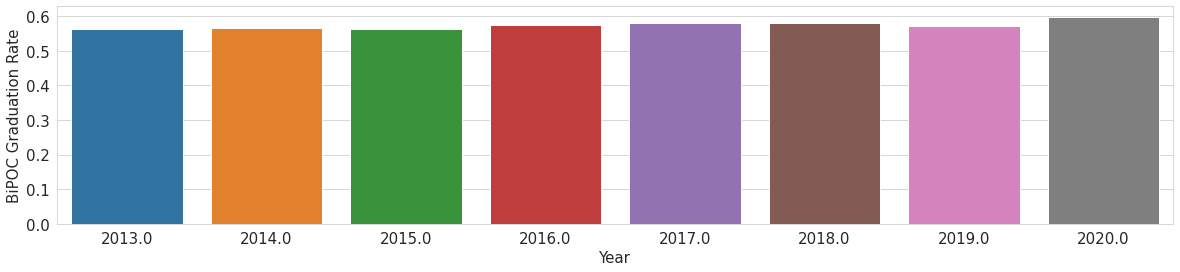

In [36]:
plt.figure(figsize = (20, 4))
df_barplot = df.groupby('year')[['year', 'gr_BiPOC_pct']].mean()
sns.barplot(data = df_barplot, x = 'year', y = 'gr_BiPOC_pct')

plt.xlabel('Year', fontsize = 15)
plt.ylabel("BiPOC Graduation Rate", fontsize = 15)
plt.tick_params(labelsize = 15);

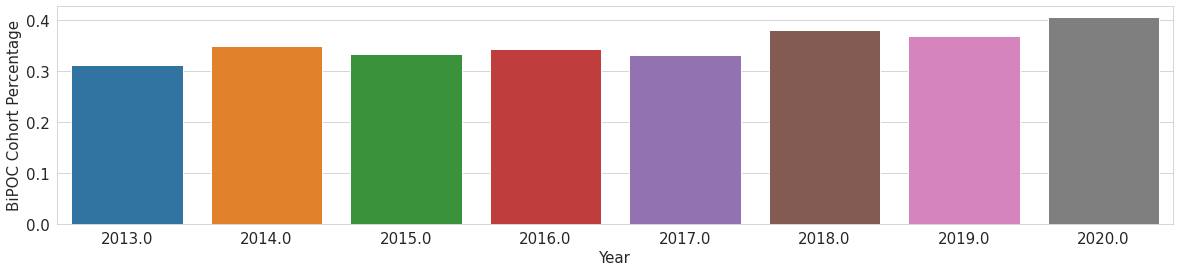

In [37]:
plt.figure(figsize = (20, 4))
df_barplot = df.groupby('year')[['year', 'co_BiPOC_pct']].mean()
sns.barplot(data = df_barplot, x = 'year', y = 'co_BiPOC_pct')

plt.xlabel('Year', fontsize = 15)
plt.ylabel("BiPOC Cohort Percentage", fontsize = 15)
plt.tick_params(labelsize = 15);

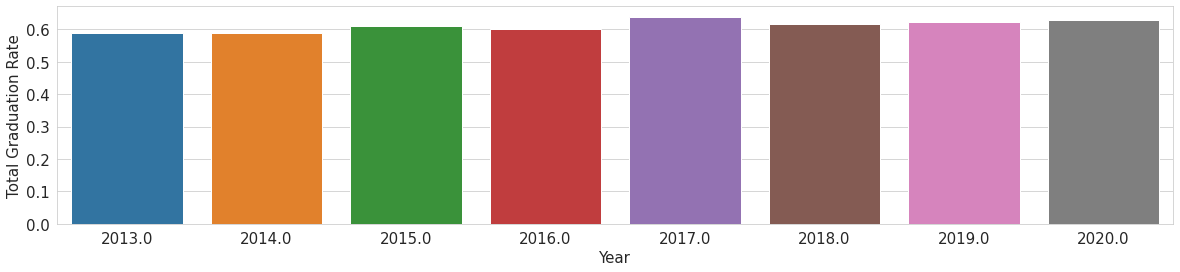

In [39]:
plt.figure(figsize = (20, 4))
df_barplot = df.groupby('year')[['year', 'gr_total_pct']].mean()
sns.barplot(data = df_barplot, x = 'year', y = 'gr_total_pct')

plt.xlabel('Year', fontsize = 15)
plt.ylabel("Total Graduation Rate", fontsize = 15)
plt.tick_params(labelsize = 15);

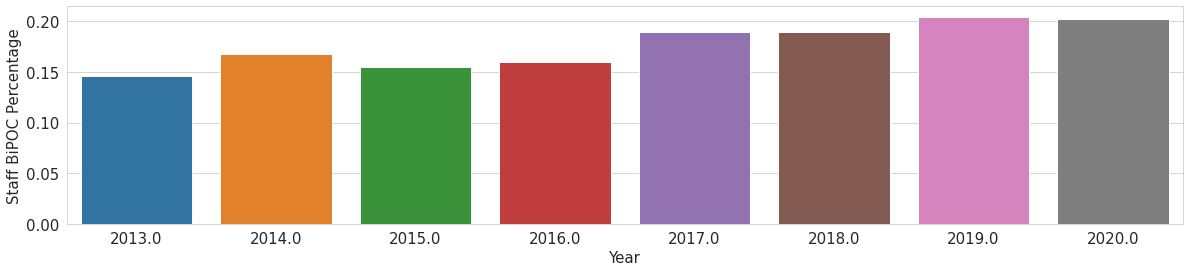

In [40]:
plt.figure(figsize = (20, 4))
df_barplot = df.groupby('year')[['year', 'hr_BiPOC_pct']].mean()
sns.barplot(data = df_barplot, x = 'year', y = 'hr_BiPOC_pct')

plt.xlabel('Year', fontsize = 15)
plt.ylabel("Staff BiPOC Percentage", fontsize = 15)
plt.tick_params(labelsize = 15);

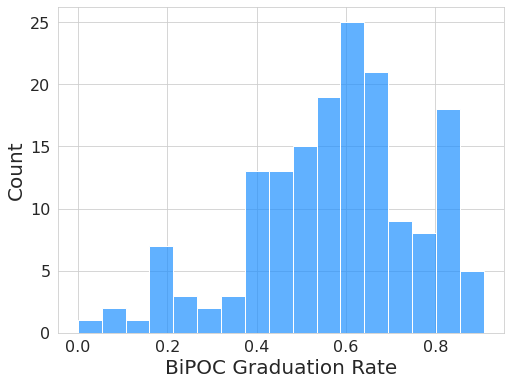

In [39]:
plt.figure(figsize = (8,6))

# Setup histogram plot
sns.histplot(data = df, x = 'gr_BiPOC_pct', bins = 17, color = 'dodgerblue', alpha = 0.7)

# Label x and y axis
plt.xlabel('BiPOC Graduation Rate', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(labelsize = 16)

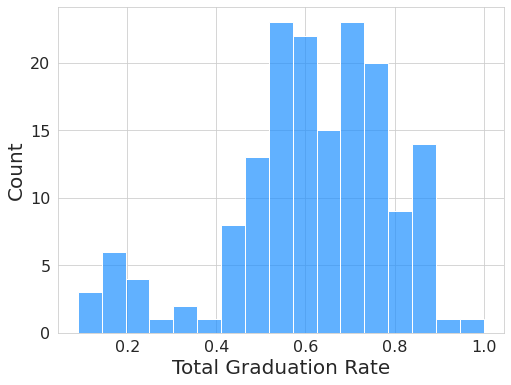

In [38]:
plt.figure(figsize = (8,6))

# Setup histogram plot
sns.histplot(data = df, x = 'gr_total_pct', bins = 17, color = 'dodgerblue', alpha = 0.7)

# Label x and y axis
plt.xlabel('Total Graduation Rate', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(labelsize = 16)

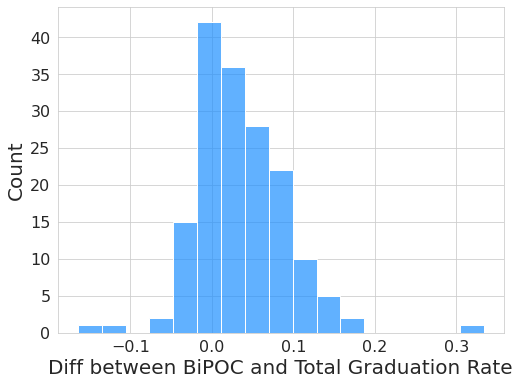

In [40]:
plt.figure(figsize = (8,6))

# Setup histogram plot
sns.histplot(data = df, x = 'gr_BiPOC_diff_pct', bins = 17, color = 'dodgerblue', alpha = 0.7)

# Label x and y axis
plt.xlabel('Diff between BiPOC and Total Graduation Rate', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(labelsize = 16)

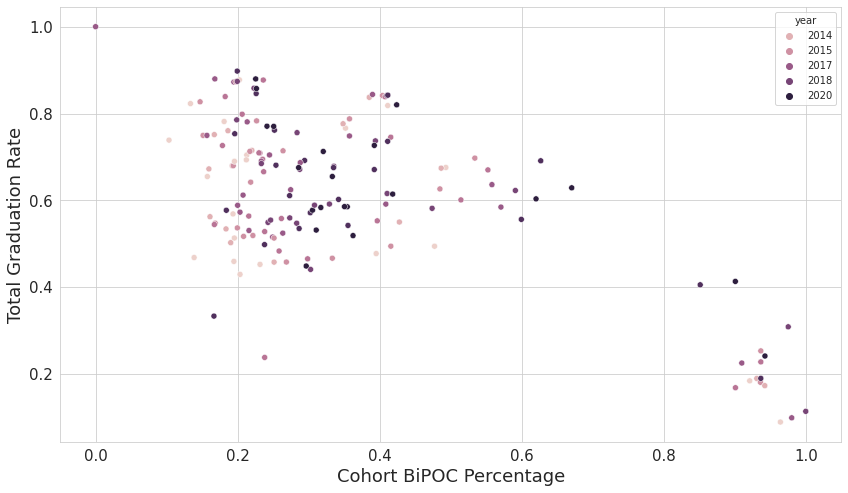

In [41]:
graphPlots('co_BiPOC_pct', 'gr_total_pct', "Cohort BiPOC Percentage", "Total Graduation Rate")

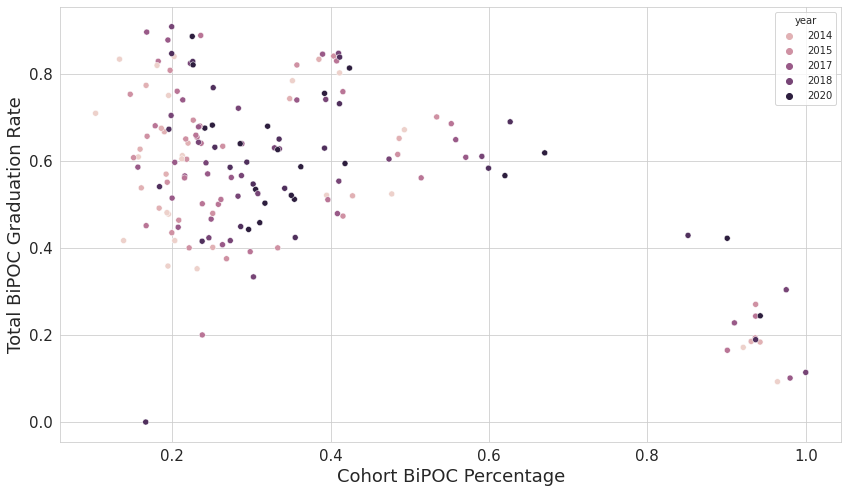

In [45]:
graphPlots('co_BiPOC_pct', 'gr_BiPOC_pct', "Cohort BiPOC Percentage", "Total BiPOC Graduation Rate")

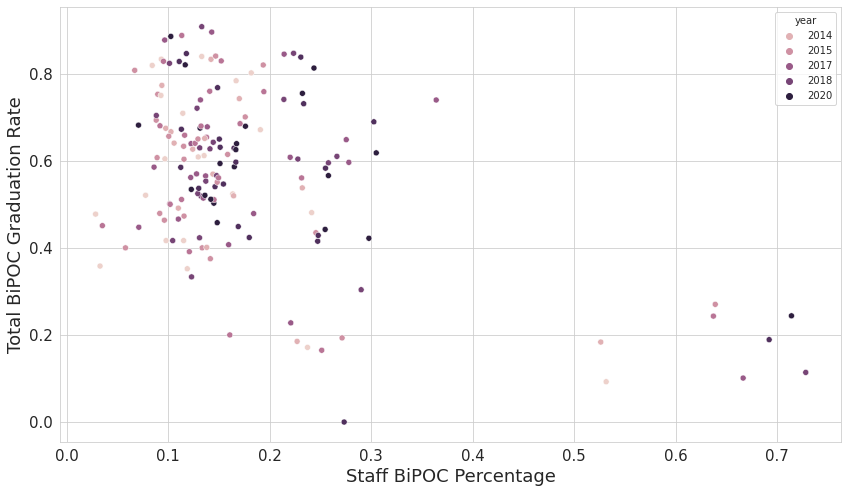

In [42]:
graphPlots('hr_BiPOC_pct', 'gr_BiPOC_pct', "Staff BiPOC Percentage", "Total BiPOC Graduation Rate")

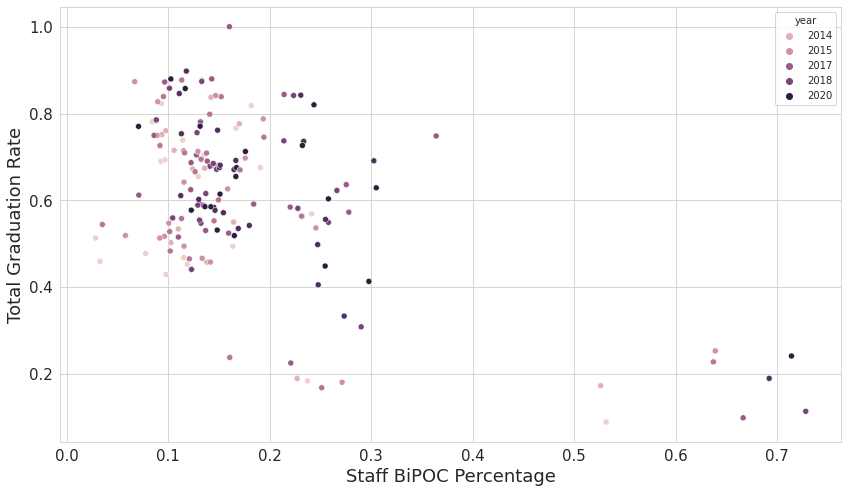

In [43]:
graphPlots('hr_BiPOC_pct', 'gr_total_pct', "Staff BiPOC Percentage", "Total Graduation Rate")

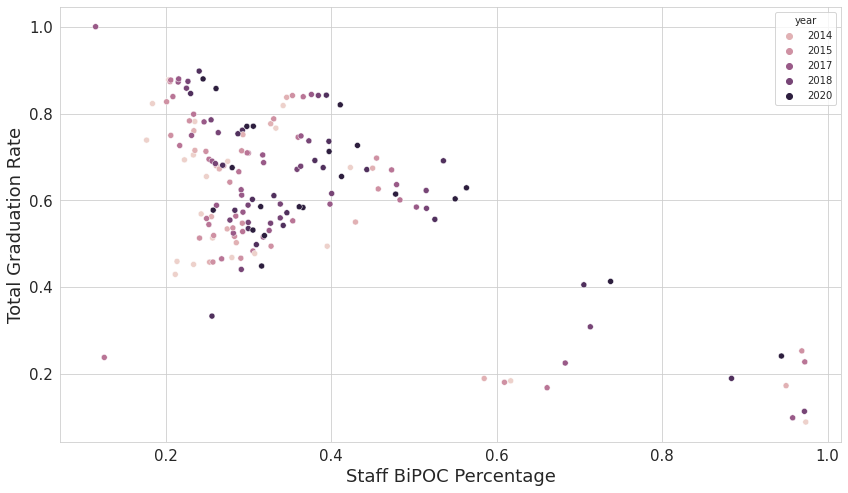

In [44]:
graphPlots('e_BiPOC_pct', 'gr_total_pct', "Staff BiPOC Percentage", "Total Graduation Rate")

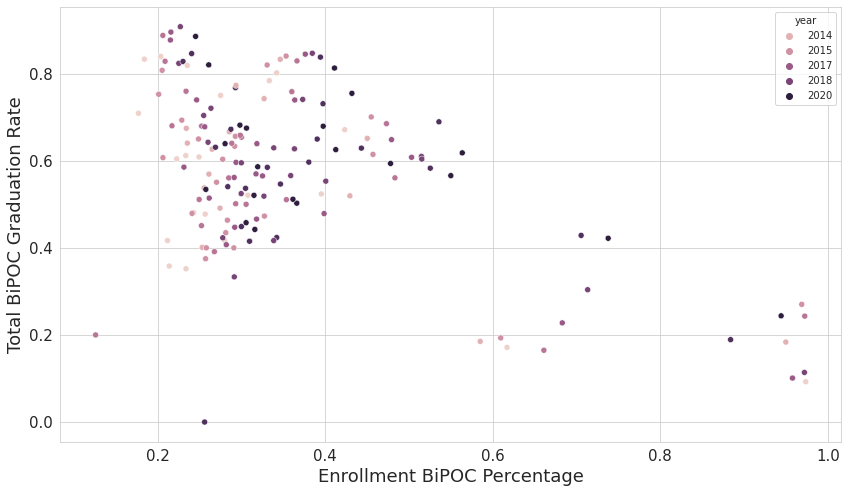

In [48]:
graphPlots('e_BiPOC_pct', 'gr_BiPOC_pct', "Enrollment BiPOC Percentage", "Total BiPOC Graduation Rate")

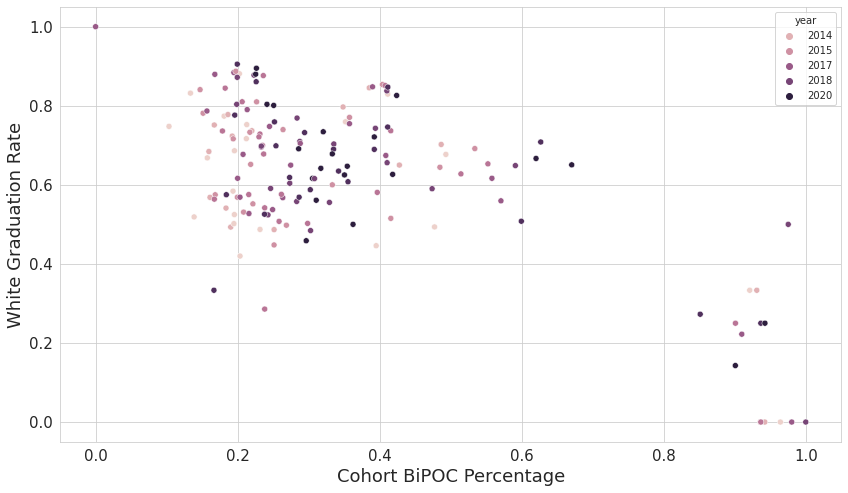

In [47]:
graphPlots('co_BiPOC_pct', 'gr_White_pct', "Cohort BiPOC Percentage", "White Graduation Rate")

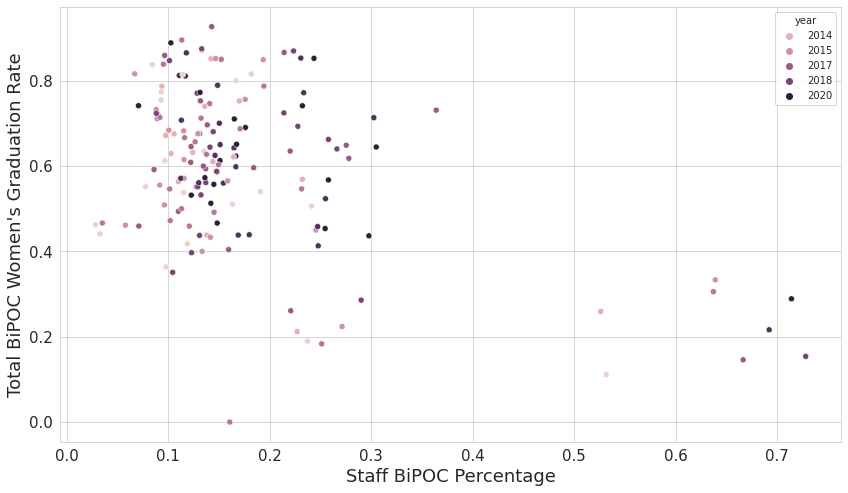

In [75]:
graphPlots('hr_BiPOC_pct', 'gr_BiPOC_w_pct', "Staff BiPOC Percentage", "Total BiPOC Women's Graduation Rate")

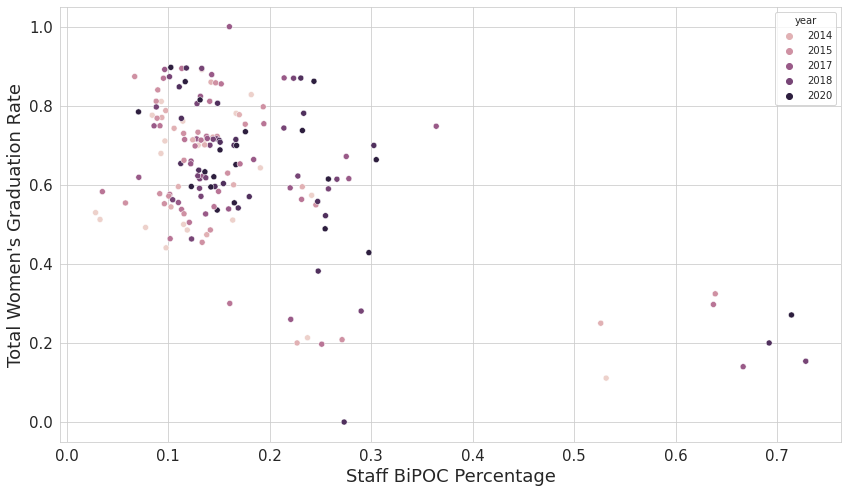

In [46]:
graphPlots('hr_BiPOC_pct', 'gr_total_w_pct', "Staff BiPOC Percentage", "Total Women's Graduation Rate")

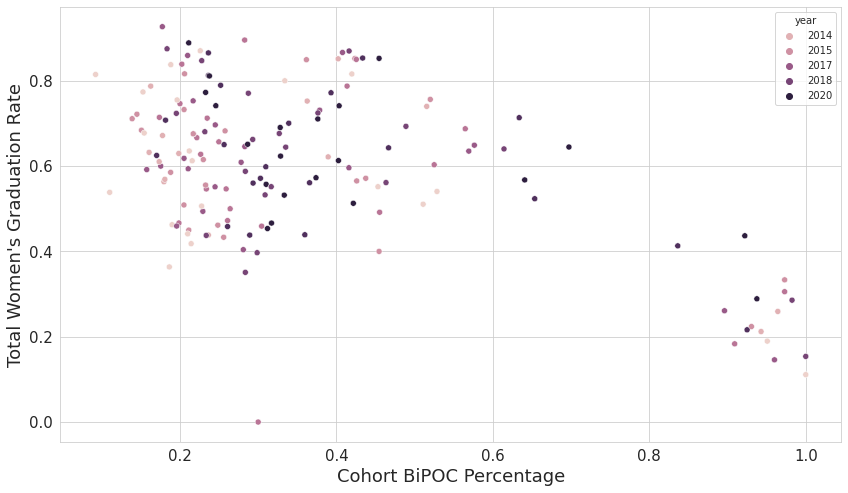

In [49]:
graphPlots('co_BiPOC_w_pct', 'gr_BiPOC_w_pct', "Cohort BiPOC Percentage", "Total Women's Graduation Rate")

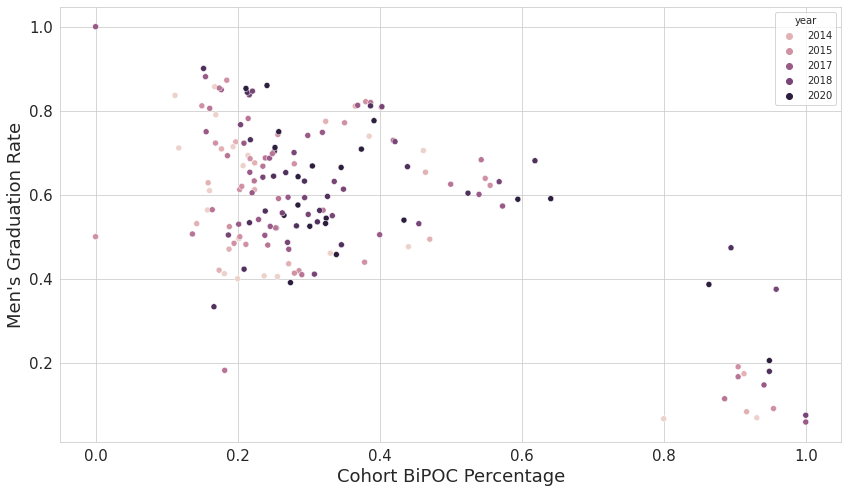

In [51]:
graphPlots('co_BiPOC_m_pct', 'gr_total_m_pct', "Cohort BiPOC Percentage", "Men's Graduation Rate")

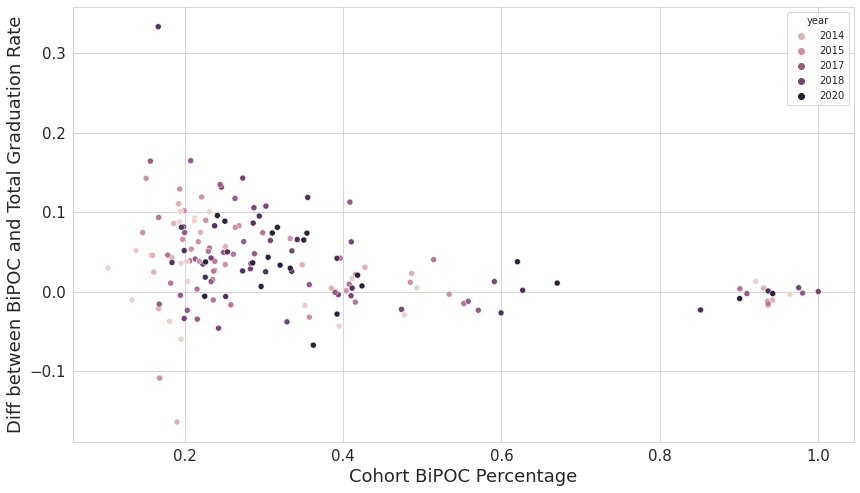

In [41]:
graphPlots('co_BiPOC_pct', 'gr_BiPOC_diff_pct', "Cohort BiPOC Percentage", "Diff between BiPOC and Total Graduation Rate")

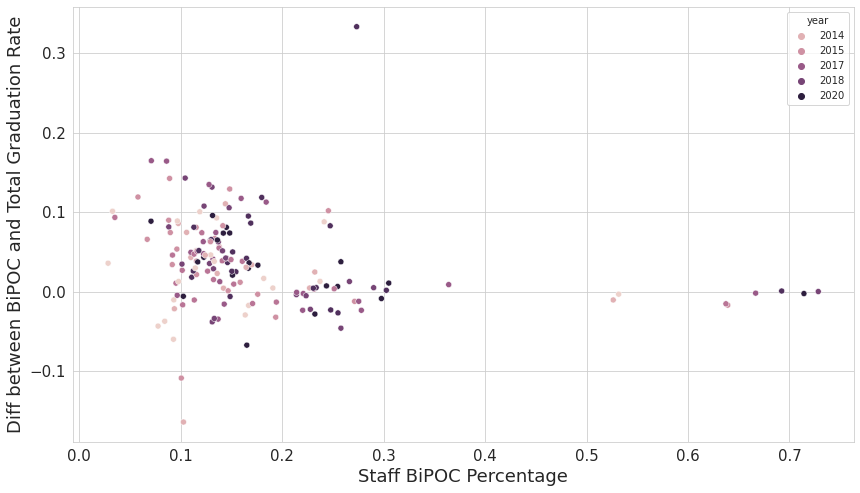

In [43]:
graphPlots('hr_BiPOC_pct', 'gr_BiPOC_diff_pct', "Staff BiPOC Percentage", "Diff between BiPOC and Total Graduation Rate")

## Modeling

In [42]:
# plot tree model
import graphviz

# Plot missing values
import missingno as msno

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Train-test splits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Models
from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

# Imputation
from sklearn.impute import KNNImputer
#from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [60]:
df_clean = df.dropna()
X = df_clean[['co_BiPOC_pct', 'e_BiPOC_pct', 'hr_BiPOC_pct']]
y = df_clean['gr_BiPOC_pct']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

In [62]:
df_pred = pd.concat([X_test, y_test], axis = 1)

df_pred.head()

,co_BiPOC_pct,e_BiPOC_pct,hr_BiPOC_pct,gr_BiPOC_pct
47,0.900990,0.661032,0.251282,0.164835
50,0.851351,0.705458,0.247826,0.428571
170,0.936709,0.883838,0.692308,0.189189
70,0.226704,0.228911,0.088136,0.693252
165,0.942308,0.949765,0.526316,0.183673


In [63]:
model_lr = linear_model.LinearRegression()

In [64]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred_lr = model_lr.predict(X_test)

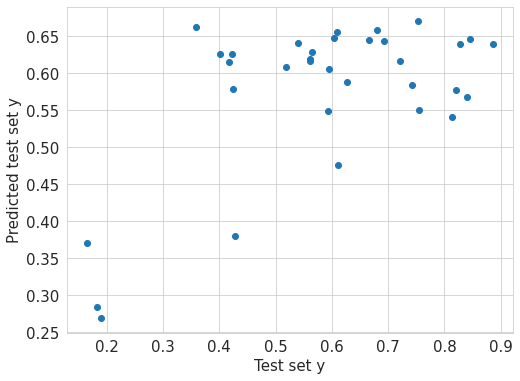

In [66]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_lr, 'o');

plt.xlabel('Test set y', fontsize = 15)
plt.ylabel('Predicted test set y', fontsize = 15)

plt.tick_params(labelsize = 15);

In [67]:
mean_squared_error(y_test, y_pred_lr, squared = False).round(3)

0.155

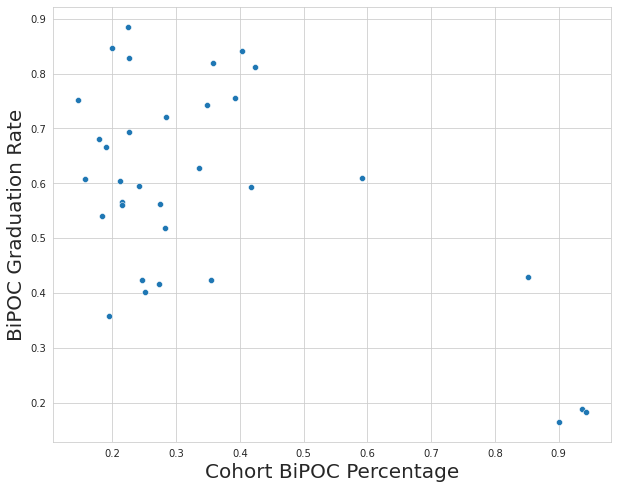

In [69]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'co_BiPOC_pct', y = 'gr_BiPOC_pct')

plt.xlabel('Cohort BiPOC Percentage',fontsize = 20)
plt.ylabel('BiPOC Graduation Rate', fontsize = 20);

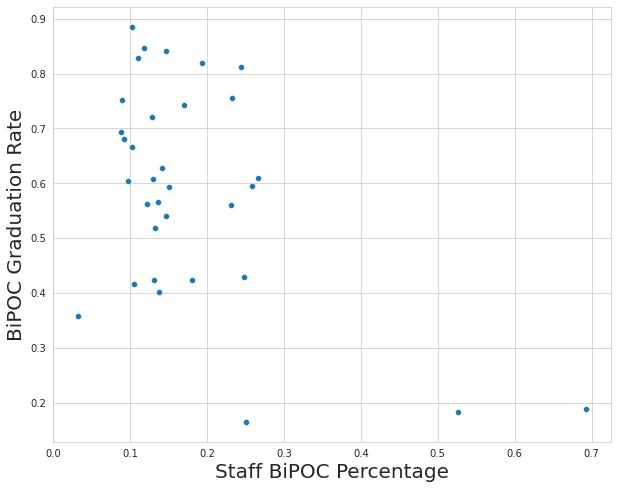

In [70]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'hr_BiPOC_pct', y = 'gr_BiPOC_pct')

plt.xlabel('Staff BiPOC Percentage',fontsize = 20)
plt.ylabel('BiPOC Graduation Rate', fontsize = 20);

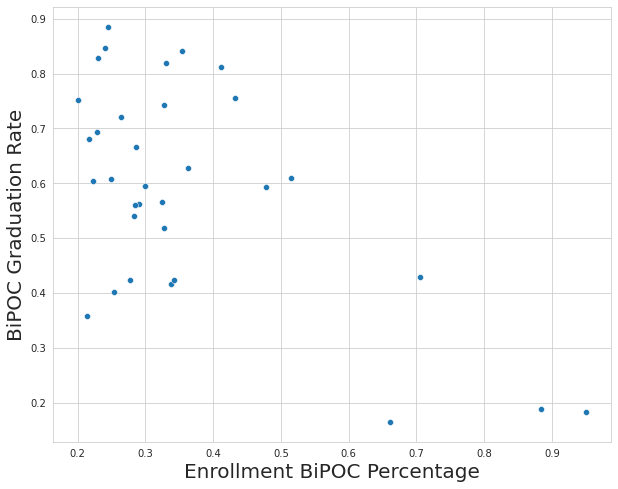

In [71]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'e_BiPOC_pct', y = 'gr_BiPOC_pct')

plt.xlabel('Enrollment BiPOC Percentage',fontsize = 20)
plt.ylabel('BiPOC Graduation Rate', fontsize = 20);

In [73]:
df_pred['gr_BiPOC_pct_lr'] = y_pred_lr

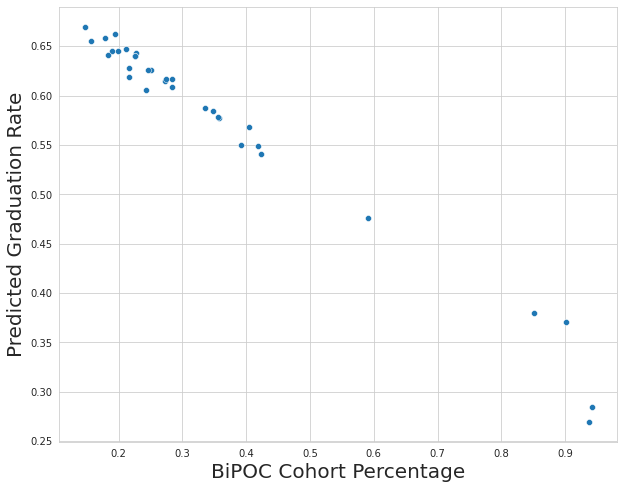

In [74]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'co_BiPOC_pct', y = 'gr_BiPOC_pct_lr')

plt.xlabel('BiPOC Cohort Percentage',fontsize = 20)
plt.ylabel('Predicted Graduation Rate', fontsize = 20);

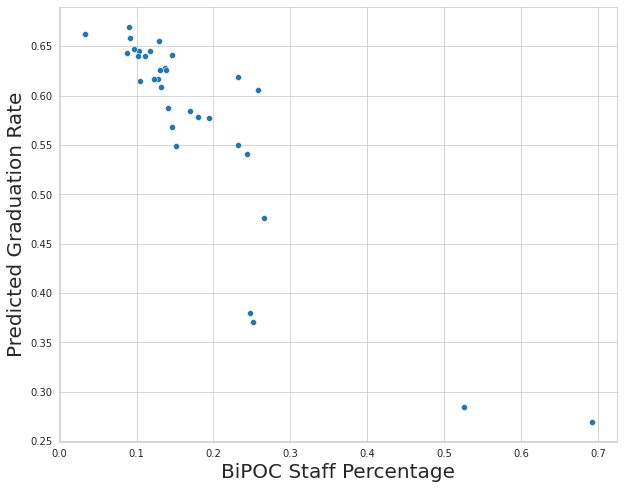

In [75]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'hr_BiPOC_pct', y = 'gr_BiPOC_pct_lr')

plt.xlabel('BiPOC Staff Percentage',fontsize = 20)
plt.ylabel('Predicted Graduation Rate', fontsize = 20);

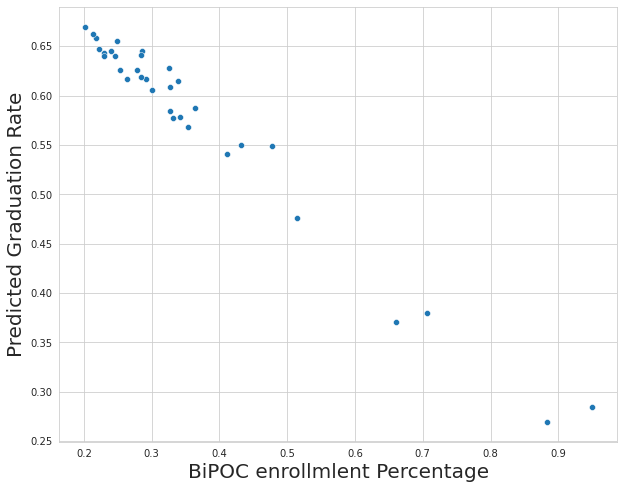

In [76]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'e_BiPOC_pct', y = 'gr_BiPOC_pct_lr')

plt.xlabel('BiPOC enrollmlent Percentage',fontsize = 20)
plt.ylabel('Predicted Graduation Rate', fontsize = 20);

In [77]:
model_rf = RandomForestRegressor(100, min_samples_leaf=5)

In [78]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5)

In [79]:
y_pred_rf = model_rf.predict(X_test)

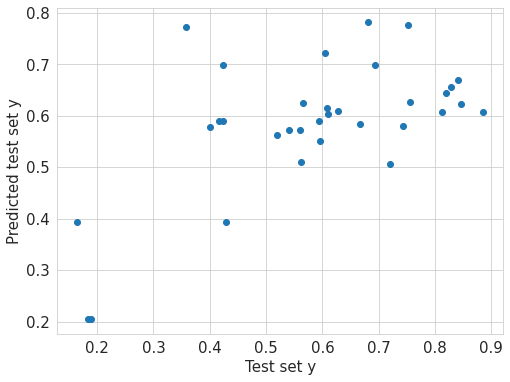

In [80]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_rf, 'o');

plt.xlabel('Test set y', fontsize = 15)
plt.ylabel('Predicted test set y', fontsize = 15)

plt.tick_params(labelsize = 15);

In [81]:
mean_squared_error(y_test, y_pred_rf, squared = False).round(3)

0.154